In [1]:
text = '' 
with open("김진호_생기부.txt", "r", encoding="utf-8") as f:
    lines = f.readlines() 

In [2]:
a = []
for line in lines:
  b = line.replace('\n', '')
  a.append(b)

In [3]:
data = (','.join(a)).replace('.', '').replace(',', '').replace('(','').replace(')','')

In [5]:
# 명사만 출력
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

tw = Twitter() 

stopwords = set(STOPWORDS)    
stopwords.update(["대한","대해", "형태소"])   

FONTPATH =  "NanumGothic.ttf"  

tokens_text= tw.nouns(data)

new_text=[]
for word in tokens_text:
  if len(word) > 1 and  word != ' ':
        new_text.append(word)
ko=nltk.Text(new_text)
ko.vocab()
new_data = ko.vocab().most_common(300)
dnew_data = dict(new_data)

C:\Users\jinho\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [9]:
dnew_data.pop('관련')
dnew_data.pop('위해')
dnew_data.pop('문제')
dnew_data.pop('활동')
dnew_data.pop('통해')
dnew_data.pop('대해')
dnew_data.pop('대한')
dnew_data.pop('자신')
dnew_data.pop('수업')
dnew_data.pop('시간')

30

In [10]:
dnew_data

{'진로': 37,
 '이해': 35,
 '능력': 34,
 '학교': 33,
 '학기': 33,
 '학생': 33,
 '수학': 32,
 '학습': 31,
 '과정': 28,
 '친구': 27,
 '적극': 27,
 '참여': 26,
 '관심': 25,
 '생각': 25,
 '영어': 23,
 '정리': 22,
 '대회': 21,
 '노력': 21,
 '사람': 20,
 '발표': 19,
 '모습': 19,
 '창의': 18,
 '영역': 18,
 '계기': 18,
 '의견': 18,
 '화학': 17,
 '학생회': 17,
 '체험': 17,
 '직업': 17,
 '과학': 16,
 '생활': 16,
 '활용': 16,
 '상황': 16,
 '자료': 16,
 '해결': 16,
 '방법': 15,
 '자세': 15,
 '설명': 15,
 '독서': 14,
 '내용': 14,
 '탐색': 14,
 '개념': 14,
 '방과후': 14,
 '다른': 14,
 '봉사활동': 13,
 '빅데이터': 13,
 '학년': 13,
 '다짐': 13,
 '본인': 13,
 '도움': 13,
 '실험': 12,
 '전문가': 12,
 '가지': 12,
 '통계': 12,
 '주제': 11,
 '부문': 11,
 '사회': 11,
 '자기': 11,
 '지식': 11,
 '분야': 10,
 '간부': 10,
 '준비': 10,
 '고민': 10,
 '수강': 10,
 '계획': 9,
 '모범': 9,
 '탐구': 9,
 '토론': 9,
 '동아리': 9,
 '통계학': 9,
 '특기': 9,
 '배려': 9,
 '교육': 9,
 '진행': 9,
 '경의': 9,
 '보임': 9,
 '향상': 9,
 '성적': 9,
 '지능': 9,
 '국어': 9,
 '교내': 8,
 '선생님': 8,
 '리더십': 8,
 '가짐': 8,
 '학급': 8,
 '학업': 8,
 '실시': 8,
 '종합': 8,
 '주도': 8,
 '기본': 8,
 '단원': 8,
 '발전': 8,
 '주변'

In [26]:
import pandas as pd

In [27]:
from matplotlib import font_manager, rc
# 차트에서 한글 출력을 위한 설정

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [15]:
df = pd.DataFrame({'단어': dnew_data.keys(), '빈도' : dnew_data.values()})
df.head()

,단어,빈도
0,진로,37
1,이해,35
2,능력,34
3,학교,33
4,학기,33


In [59]:
df = df.sort_values(by = '빈도', ascending = False)

In [60]:
x = df['단어'][:30]
y = df['빈도'][:30]

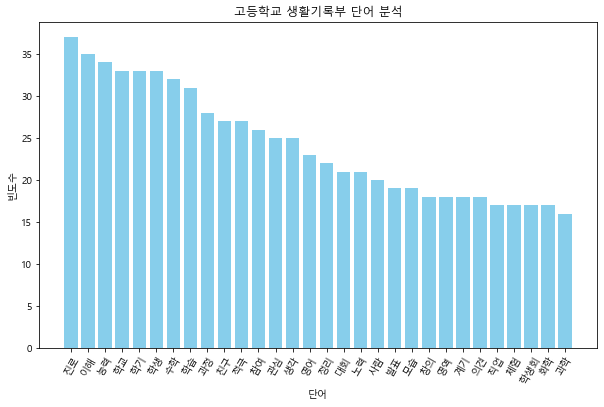

In [93]:
plt.figure(figsize = (10, 6))
plt.bar(x, y, color = 'skyblue')
plt.xticks(rotation = 60)
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.title('고등학교 생활기록부 단어 분석')
plt.show()